# Decision Trees

To display decision trees, you need to install pydot and pydotplus:

<code>conda install pydot
pip install pydotplus
</code>

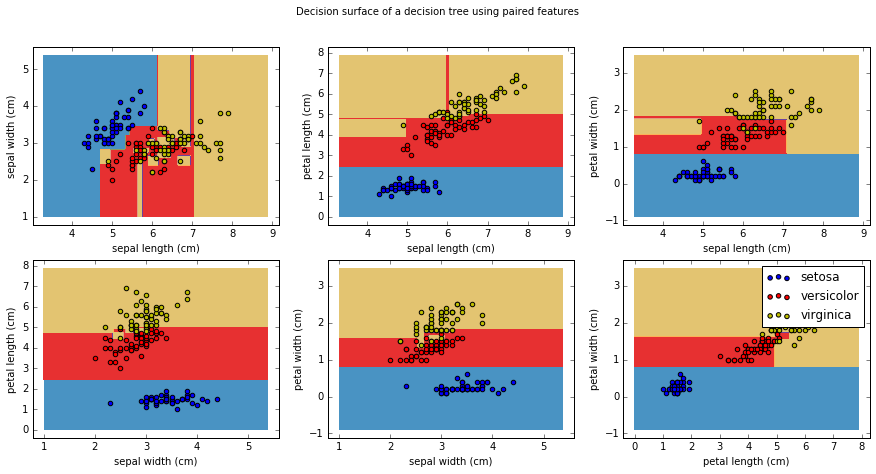

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree 

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=[15,7])

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cross_validation, preprocessing, tree
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:100, [0,1]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=5)

In [3]:
dtc = tree.DecisionTreeClassifier(criterion='entropy')#, max_depth=3)
dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)

print "Decision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report"
print classification_report(y_test,predicted)

Decision Tree Results
Confusion Matrix: 
[[13  0]
 [ 0  7]]

 Classifcation Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00        20



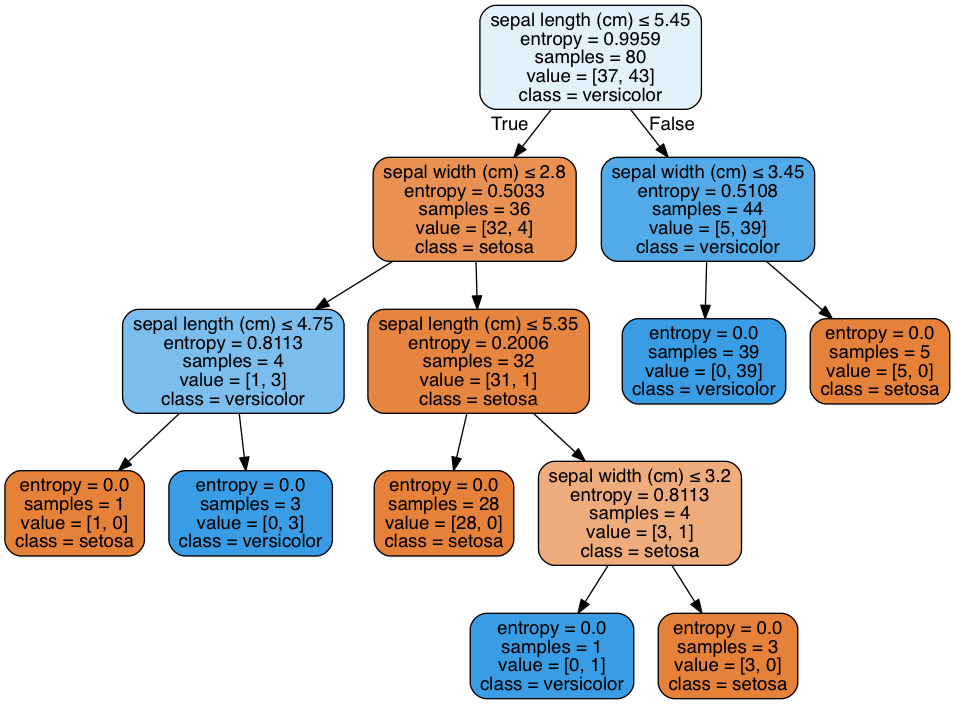

In [4]:
feature_names = ['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

target_names = ['setosa', 'versicolor', 'virginica']

import pydotplus 
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data,
                          feature_names=feature_names,  
                          class_names=target_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

## KDD Cup Dataset

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing, cross_validation

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2,l1
from keras.optimizers import SGD
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

np.random.seed = 47

data = pd.read_csv('kddcup.data_10_percent.csv',header=None)
dataCols = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
    'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','target']
data.columns = dataCols

print("Shape: ", data.shape)
data = data.reindex(np.random.permutation(data.index)).reset_index(drop=True)

target = data['target'].copy()
data = data.drop('target', axis=1)

discreteCols = ['protocol_type','service','flag']
dataDummies = pd.get_dummies(data[discreteCols])
data = data.drop(discreteCols, axis=1)

data = dataDummies.join(data)

target[target != 'normal.'] = 'abnormal'
target[target == 'normal.'] = 'normal'
print("Targets: ", target.unique())

# split the data into training and testing sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    data, target, test_size=0.5, random_state=50)

X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.
('Shape: ', (494021, 42))
('Targets: ', array(['normal', 'abnormal'], dtype=object))
(247010, 118)
(247010,)
(247011, 118)
(247011,)


In [6]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)

print "Decision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report"
print classification_report(y_test,predicted)

Decision Tree Results
Confusion Matrix: 
[[197744    581]
 [   783  47903]]

 Classifcation Report
             precision    recall  f1-score   support

   abnormal       1.00      1.00      1.00    198325
     normal       0.99      0.98      0.99     48686

avg / total       0.99      0.99      0.99    247011



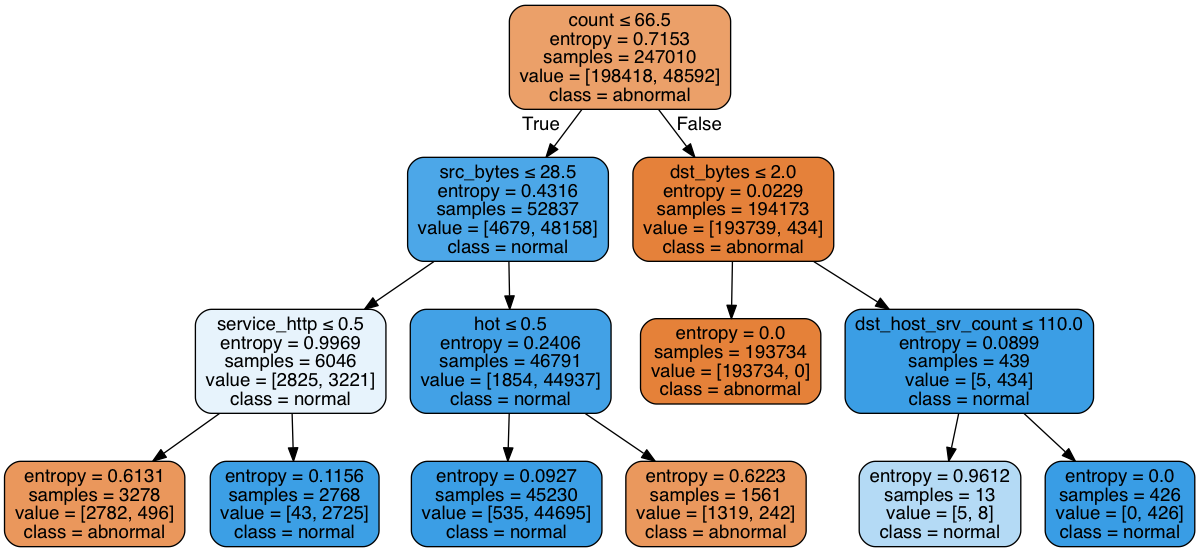

In [7]:
import pydotplus 
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data,
                          feature_names=X_train.columns,  
                          class_names=['abnormal','normal'],  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

## Decision Tree Regression

In [8]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cross_validation

advertising = pd.read_csv('Advertising.csv',usecols=(1,2,3,4))

X = np.array(advertising['TV']).reshape(-1,1)
y = np.array(advertising['Sales'])

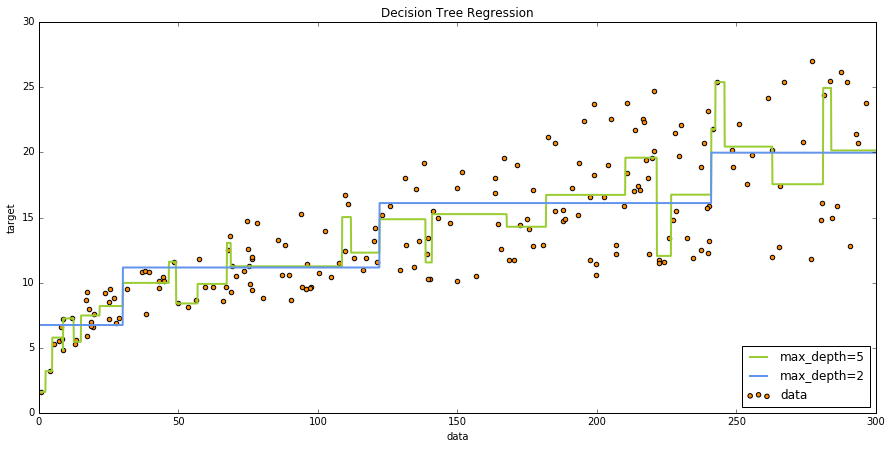

In [9]:
# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 300, 0.1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=[15,7])
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.xlim([0,300])
plt.title("Decision Tree Regression")
plt.legend(loc='lower right')
plt.show()

## Voting Classifier

In [24]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X_iris, y_iris = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_iris, y_iris, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


# Decision Trees and Gridsearch

### Predict a biological response of molecules from their chemical properties

In order to use this data, you must <a href="https://www.kaggle.com/c/bioresponse">download it</a> directly from Kaggle.


"The objective of the competition is to help us build as good a model as possible so that we can, as optimally as this data allows, relate molecular information, to an actual biological response.

Each row in this data set represents a molecule. The first column contains experimental data describing an actual biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are calculated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized."



In [10]:
import pandas as pd

data = pd.read_csv("train.csv")
target = data['Activity'].copy()
data = data.drop('Activity',axis=1)
data.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print target.ix[0:4]

0    1
1    1
2    1
3    1
4    0
Name: Activity, dtype: int64


In [12]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    data, target, test_size=0.5, random_state=50)

In [13]:
from sklearn.grid_search import GridSearchCV
from sklearn import tree

max_depths = range(1,30,1)

dtc = tree.DecisionTreeClassifier(criterion='entropy')
grid = GridSearchCV(estimator=dtc, param_grid=dict(max_depth=max_depths))
grid.fit(X_train, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.max_depth)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.7648
4


In [14]:
predicted = grid.predict(X_test)

print "Decision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report"
print classification_report(y_test,predicted)

Decision Tree Results
Confusion Matrix: 
[[644 237]
 [233 762]]

 Classifcation Report
             precision    recall  f1-score   support

          0       0.73      0.73      0.73       881
          1       0.76      0.77      0.76       995

avg / total       0.75      0.75      0.75      1876



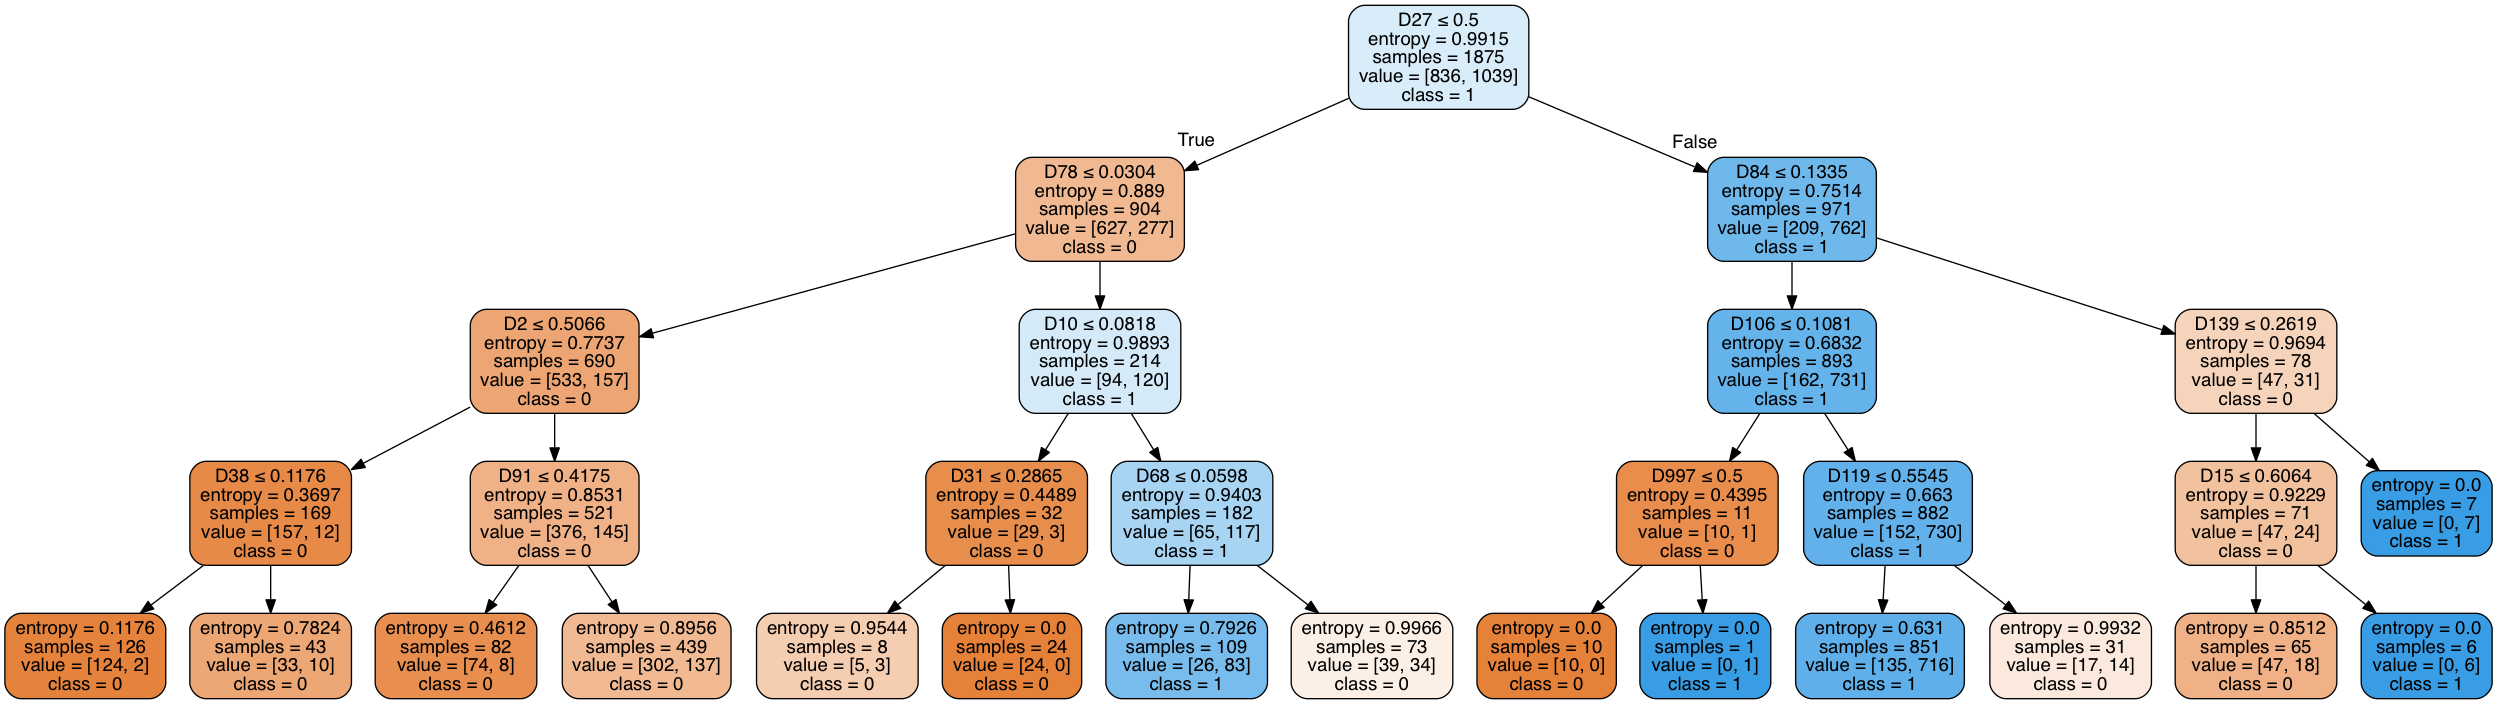

In [15]:
import pydotplus 
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(grid.best_estimator_, out_file=dot_data,
                          feature_names=X_train.columns,  
                          class_names=['0','1'],  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

# Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_train, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.7728
400


In [18]:
predicted = grid.predict(X_test)

print "Decision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report"
print classification_report(y_test,predicted)

Decision Tree Results
Confusion Matrix: 
[[641 240]
 [180 815]]

 Classifcation Report
             precision    recall  f1-score   support

          0       0.78      0.73      0.75       881
          1       0.77      0.82      0.80       995

avg / total       0.78      0.78      0.78      1876



# Extra Randomized Trees

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

etc = ExtraTreesClassifier(random_state=47)
grid = GridSearchCV(estimator=etc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_train, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.766933333333
100


In [20]:
predicted = grid.predict(X_test)

print "Decision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report"
print classification_report(y_test,predicted)

Decision Tree Results
Confusion Matrix: 
[[639 242]
 [192 803]]

 Classifcation Report
             precision    recall  f1-score   support

          0       0.77      0.73      0.75       881
          1       0.77      0.81      0.79       995

avg / total       0.77      0.77      0.77      1876



# Gradient Boosting Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=47)

n_estimators_list = [5,10,50,100,200,300,400,1000]
grid = GridSearchCV(estimator=gbc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_train, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=47, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.7776
300


In [22]:
predicted = grid.predict(X_test)

print "Decision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report"
print classification_report(y_test,predicted)

Decision Tree Results
Confusion Matrix: 
[[637 244]
 [160 835]]

 Classifcation Report
             precision    recall  f1-score   support

          0       0.80      0.72      0.76       881
          1       0.77      0.84      0.81       995

avg / total       0.79      0.78      0.78      1876



# Interpretation of Ensembles: Feature Importance

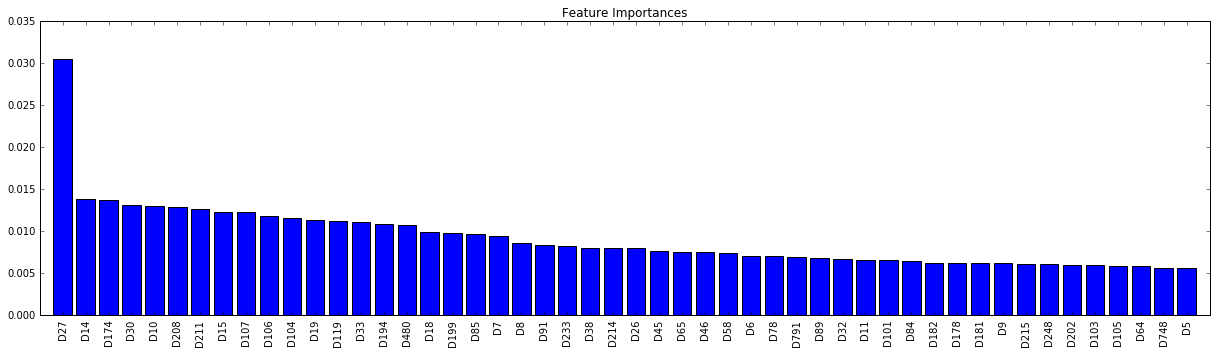

In [23]:
importances = grid.best_estimator_.feature_importances_

indices = np.argsort(importances)[::-1]
feat_labels = data.columns

plt.figure(figsize=[17,5])

plt.title('Feature Importances')
plt.bar(range(50), 
        importances[indices][0:50],
        align='center')

plt.xticks(range(50), 
           feat_labels[indices][0:50], rotation=90)

plt.xlim([-1,50])
plt.tight_layout()

plt.show()